# Temperatura y Precipitación en Guadalajara

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

1) Descarga los archivos csv de tempertura promedio y precipitación en guadalajara de github y cargalos a un _dataframe_.

In [2]:
tpro = pd.read_csv("14066-GUADALAJARA (DGE)-JAL-Tprom.csv", na_values=["null"], header=7)
prec = pd.read_csv("14066-GUADALAJARA (DGE)-JAL-Precip.csv", na_values=["null"], header=7)
tpro.head()

,Mes,Día,Anio,Datos
0,9,1,1930,22.0
1,9,2,1930,21.5
2,9,3,1930,21.5
3,9,4,1930,21.5
4,9,5,1930,22.0


2) Grafica los datos de temperatura promedio.

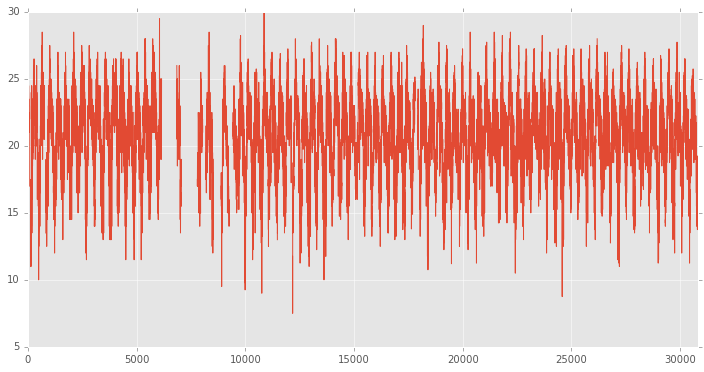

In [3]:
tpro.Datos.plot(figsize=(12,6));

3) __pandas__ trabaja muy bien con datos de fechas, pero hay que colocar esa información en un formato que pandas lo entienda. Haremos un valor siguiendo el formato AAAAMMDD y lo convertiremos a un dato tipo fecha usando:

    pd.to_datetime(tpro.Anio*10000 + tpro.Mes * 100 + tpro.Día,format='%Y%m%d')
    
y lo guardaremos en un campo llamado Fecha.

In [4]:
tpro['Fecha'] = pd.to_datetime(tpro.Anio*10000 + tpro.Mes * 100 + tpro.Día,format='%Y%m%d')
prec['Fecha'] = pd.to_datetime(prec.Anio*10000 + prec.Mes * 100 + prec.Día,format='%Y%m%d')
tpro.head()

,Mes,Día,Anio,Datos,Fecha
0,9,1,1930,22.0,1930-09-01
1,9,2,1930,21.5,1930-09-02
2,9,3,1930,21.5,1930-09-03
3,9,4,1930,21.5,1930-09-04
4,9,5,1930,22.0,1930-09-05


4) Ahora, le indicaremos a __pandas__ que queremos que ese sea nuestro indice usando:

    tpro.set_index('Fecha', inplace=True)

In [5]:
tpro.set_index('Fecha', inplace=True)
prec.set_index('Fecha', inplace=True)
tpro.head()

,Mes,Día,Anio,Datos
Fecha,,,,
1930-09-01,9,1,1930,22.0
1930-09-02,9,2,1930,21.5
1930-09-03,9,3,1930,21.5
1930-09-04,9,4,1930,21.5
1930-09-05,9,5,1930,22.0


5) Podemos quitar los campos que no utilizaremos con:

    tpro.drop(['Día','Mes','Anio'], axis=1, inplace=True)

    

In [6]:
tpro.drop(['Día','Mes','Anio'], axis=1, inplace=True)
prec.drop(['Día','Mes','Anio'], axis=1, inplace=True)
tpro.head()

,Datos
Fecha,
1930-09-01,22.0
1930-09-02,21.5
1930-09-03,21.5
1930-09-04,21.5
1930-09-05,22.0


6) Obten la media y la desviación estandar de la temperatura promedio. En este caso es necesario usar el método `dropna()` para limpiar la tabla de aquellos datos no numéricos.

In [7]:
tpro.dropna().describe()

,Datos
count,27759.000000
mean,20.924565
std,2.840715
min,7.500000
25%,19.000000
50%,21.250000
75%,23.000000
max,30.000000


Ahora crearemos tres filtros para trabajar con los datos:

In [8]:
filtro_dia = lambda x: x.day
filtro_mes = lambda x: x.month
filtro_dia_del_año = lambda x: x.dayofyear

podemos usar estos filtros con:

    (tpro.index.map(filtro_dia) == dia)

7) Obten la temperatura promedio del día de hoy.

In [9]:
dia = 29
mes = 6

t_dia = tpro[(tpro.index.map(filtro_dia) == dia) & (tpro.index.map(filtro_mes) == mes)].dropna().values.mean()
print("La temperatura pomedio para el {} del mes {} ha sido {:.1f}°C".format(dia, mes, t_dia))

La temperatura pomedio para el 29 del mes 6 ha sido 22.8°C


In [10]:
t_dia = tpro[(tpro.index.map(lambda x: x.dayofyear) == 180)].dropna().values.mean()
print("La temperatura pomedio para el dia 180 ha sido {:.1f}°C".format(t_dia))

La temperatura pomedio para el dia 180 ha sido 22.8°C


8) Grafica las temperaturas para cada día del año.

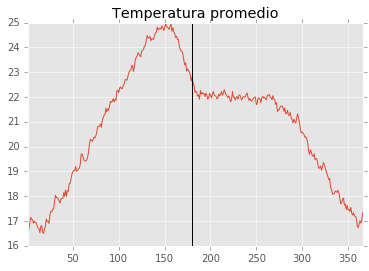

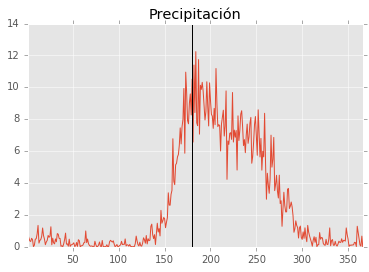

In [11]:
key = lambda x: x.dayofyear

# temperatura promedio
grupos_dia_tpro = tpro.Datos.groupby(key)
tpro_dia = grupos_dia_tpro.mean()
tpro_dia.plot()
plt.plot((180, 180), (16, 25), 'k-')
plt.title("Temperatura promedio")

# precipitacion
fig = plt.figure()
grupos_dia_prec = prec.Datos.groupby(key)
prec_dia = grupos_dia_prec.mean()
prec_dia.plot()
plt.plot((180, 180), (0, 14), 'k-')
plt.title("Precipitación")

9) Grafica las temperaturas para este día.

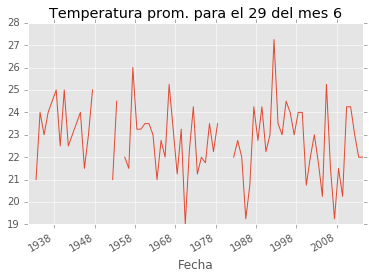

In [12]:
tpro[(tpro.index.map(filtro_dia) == dia) & (tpro.index.map(filtro_mes) == mes)].Datos.plot()
plt.title("Temperatura prom. para el {} del mes {}".format(dia,mes))